In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/Ïó∞ÎèÑÎ≥Ñ_Í±¥Í∞ïÍ≤ÄÏßÑ/Í±¥Í∞ïÍ≤ÄÏßÑ_2017.csv")

In [3]:
data["Year_ID"] = data["YEAR"].astype(str) + "_" + data["ID"].astype(str)
cols = ['Year_ID'] + [col for col in data.columns if col != 'Year_ID']
data = data[cols]
data = data.drop(['ID', 'YEAR'], axis=1)

In [4]:
targets = ['OBESITY', 'DIABETES', 'HYPERTENSION', 'DYSLIPIDEMIA', 
               'LIVER_ABNORMAL', 'KIDNEY_ABNORMAL', 'ANEMIA']

In [5]:
df=data.drop(targets, axis=1)

In [6]:
input_features = ["HEIGHT", "WEIGHT", "WAIST","BP_HIGH", "BP_LWST", 
                  "BLDS","TOT_CHOLE", "TRIGLYCERIDE", "HDL_CHOLE", 
                  "LDL_CHOLE", "HMG", "OLIG_PROTE_CD",
                  "CREATININE", "SGOT_AST", "SGPT_ALT", "GAMMA_GTP", 
                  "SMK_STAT_TYPE_CD", "DRK_YN", "BMI"]

for col in input_features:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] ÏßÄÏ†ïÎêú ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\anaconda3\envs\py312ff2\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\anaconda3\envs\py312ff2\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\anaconda3\envs\py312ff2\Lib\subprocess.py", line 1540, in _execute_ch

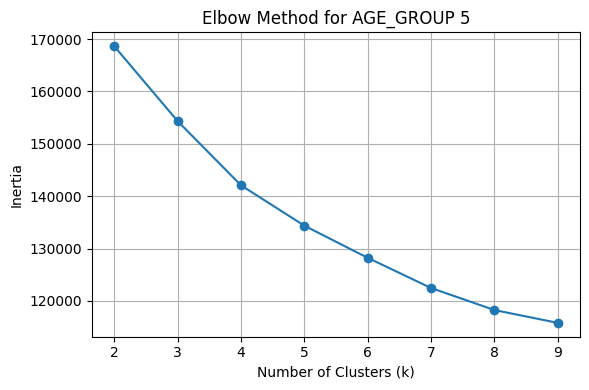

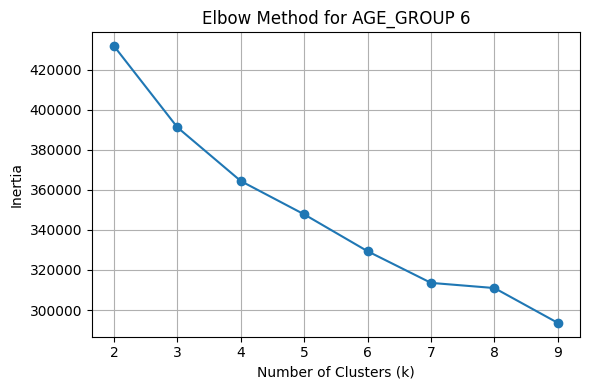

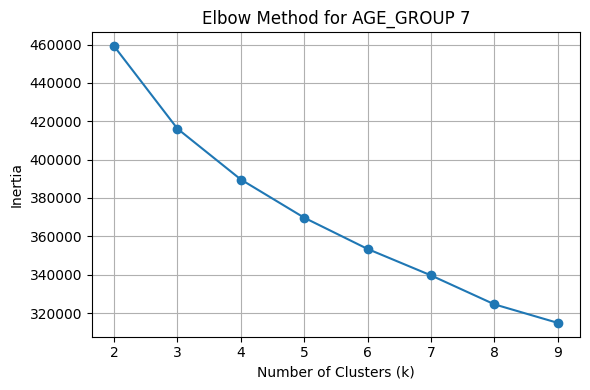

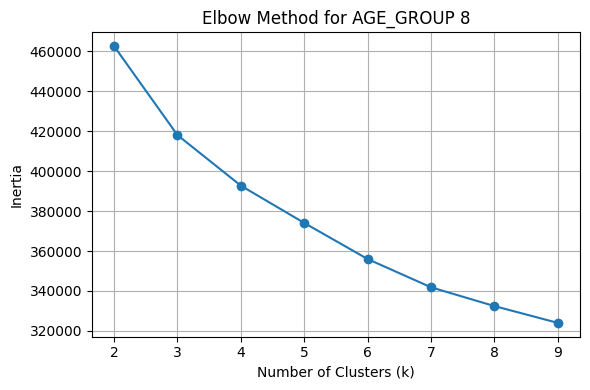

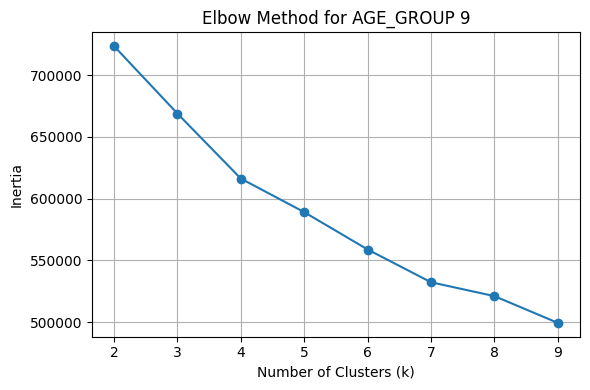

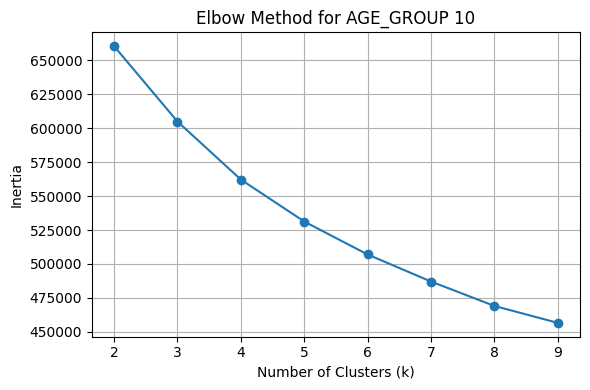

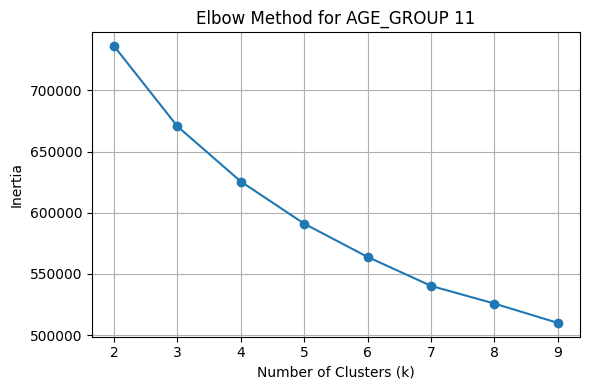

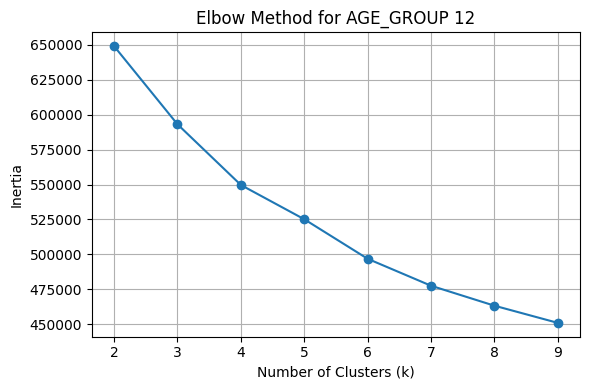

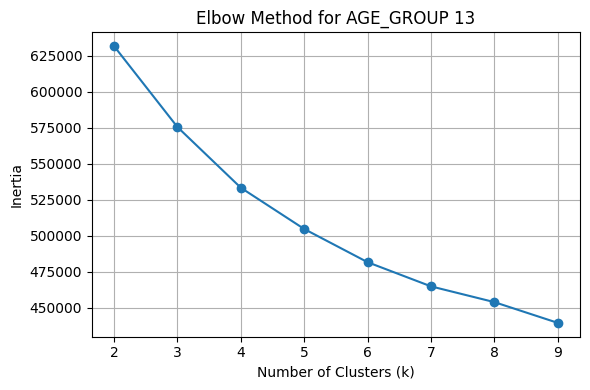

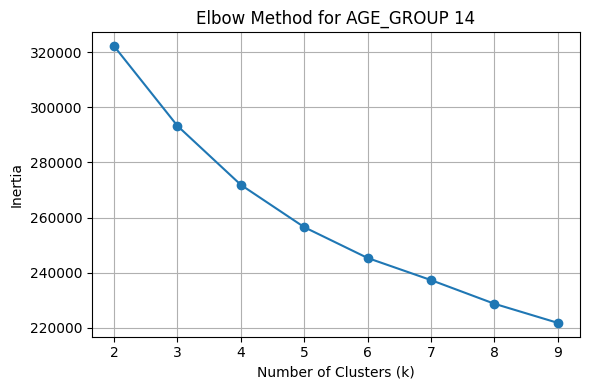

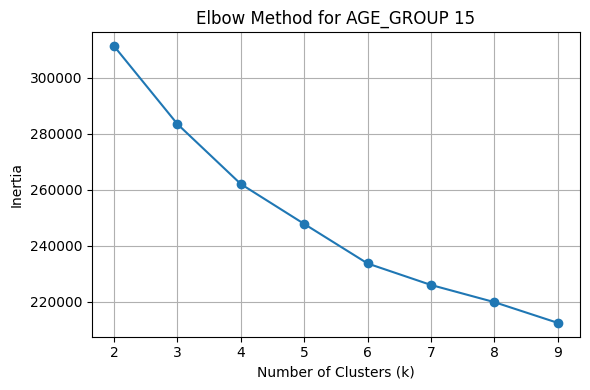

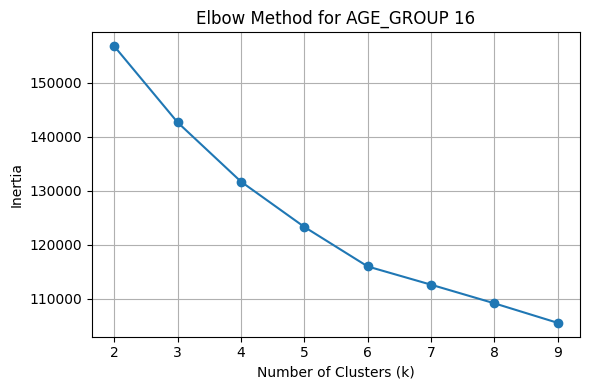

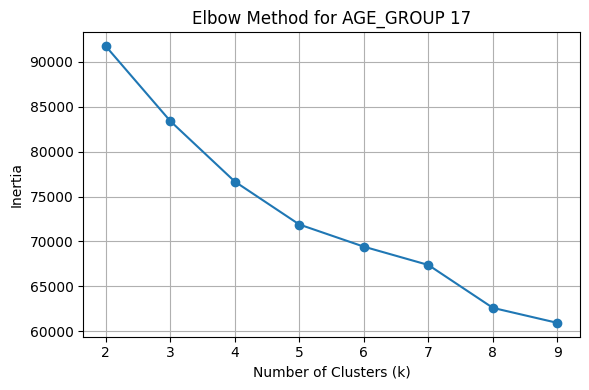

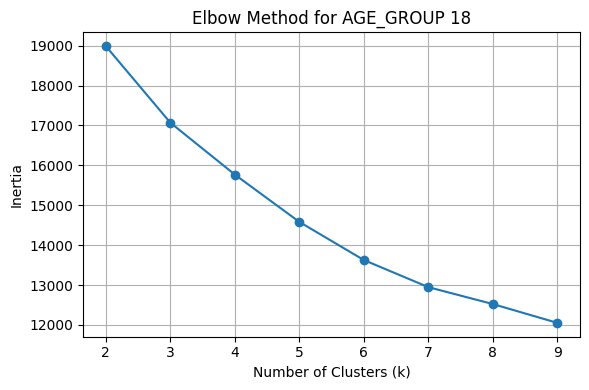

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
# 1. ÏÇ¨Ïö©Ìï† Í±¥Í∞ï Î≥ÄÏàò Î™©Î°ù
features = [
    'SEX', 'WAIST', 'BMI',
    'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE',
    'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP',
    'SMK_STAT_TYPE_CD', 'DRK_YN'
]
# 2. Ïó∞Î†πÎåÄÎ≥ÑÎ°ú KMeans ÏóòÎ≥¥Ïö∞ Î∂ÑÏÑù
for age_group in sorted(df['AGE_GROUP'].unique()):
    df_age = df[df['AGE_GROUP'] == age_group].copy()
    df_age = df_age.dropna(subset=features)
    
    # Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÑàÎ¨¥ Ï†ÅÏúºÎ©¥ Ï†úÏô∏
    if len(df_age) < 50:
        continue
    
    # Ï†ïÍ∑úÌôî
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_age[features])
    
    # ÏóòÎ≥¥Ïö∞Ïö© inertia Í≥ÑÏÇ∞
    inertia = []
    K = range(2, 10)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6, 4))
    plt.plot(K, inertia, marker='o')
    plt.title(f'Elbow Method for AGE_GROUP {age_group}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

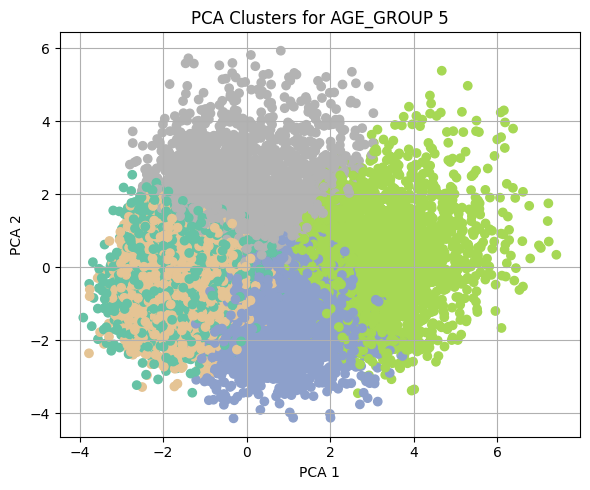

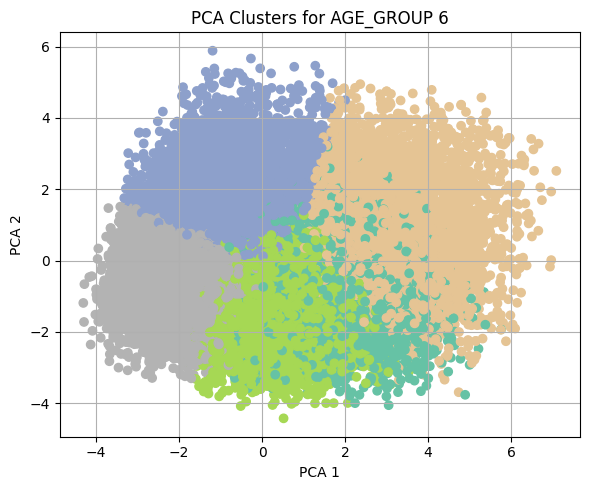

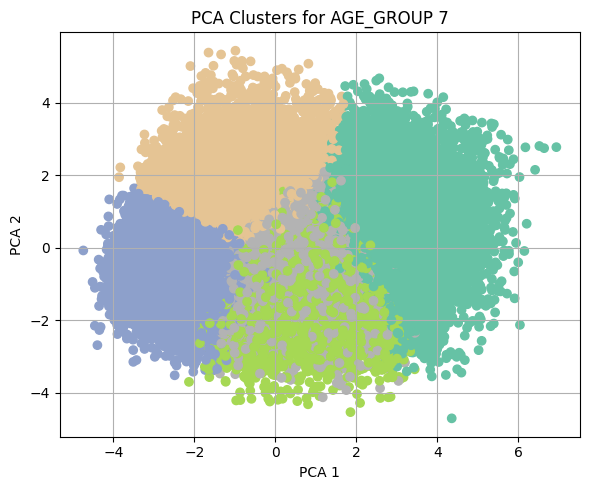

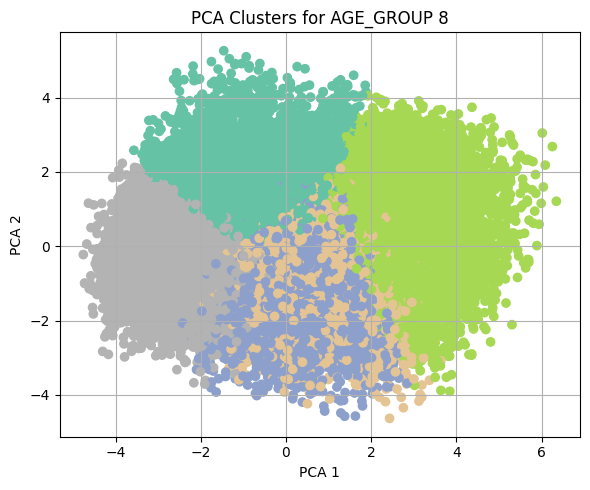

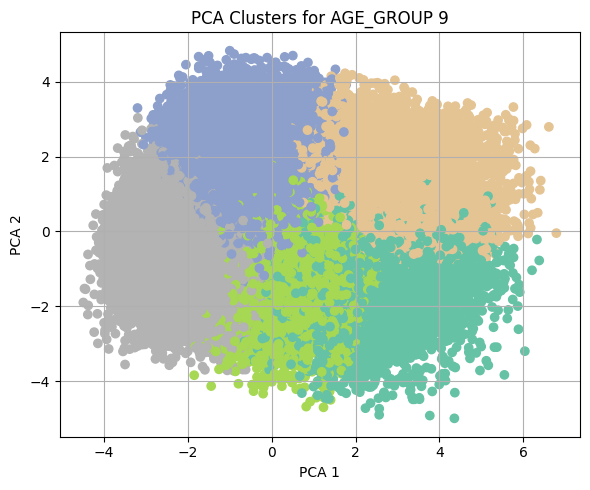

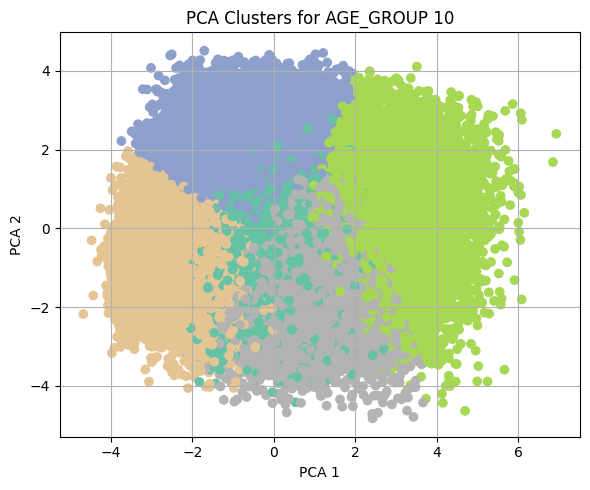

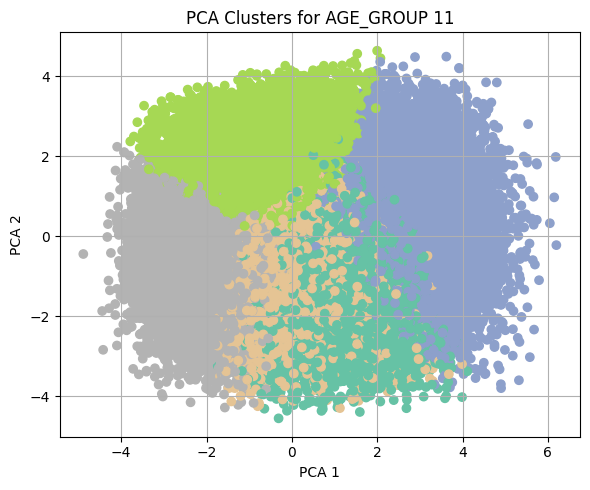

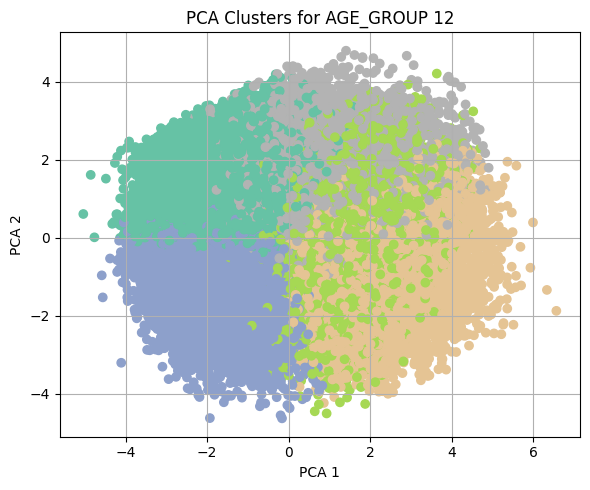

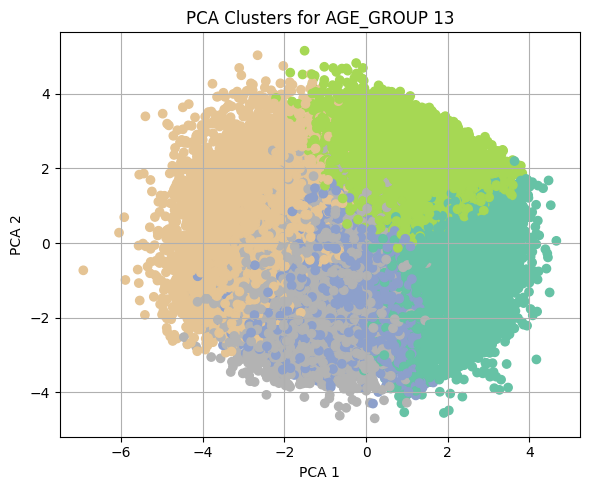

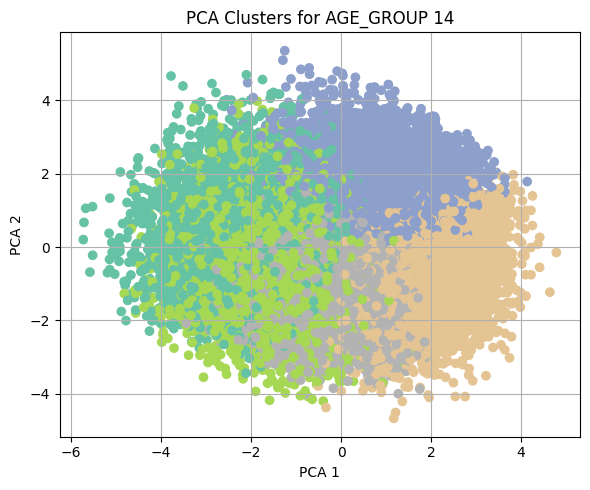

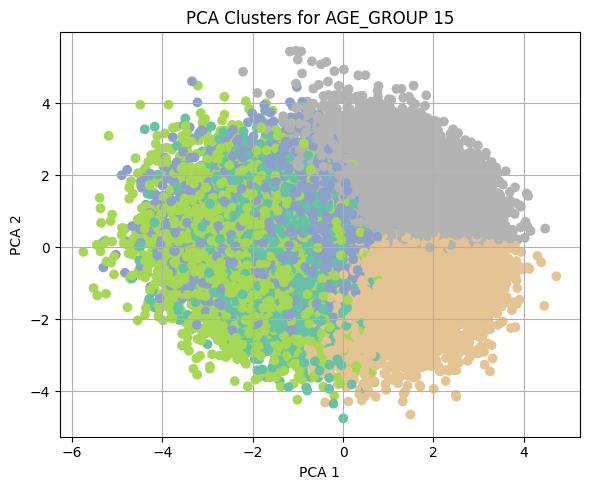

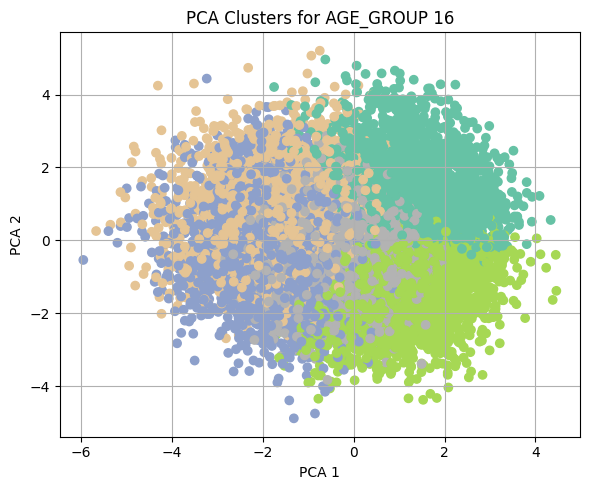

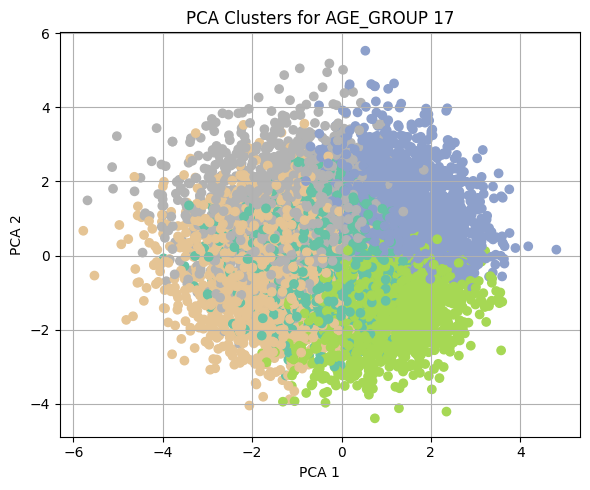

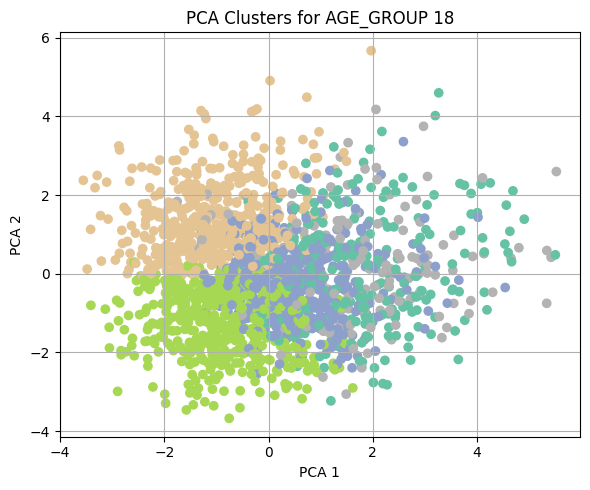

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# 1. ÏÇ¨Ïö©Ìï† Î≥ÄÏàò Î™©Î°ù
features = [
    'SEX', 'WAIST', 'BMI',
    'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE',
    'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP',
    'SMK_STAT_TYPE_CD', 'DRK_YN'
]

# 2. AGE_GROUPÎ≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
for age_group in sorted(df['AGE_GROUP'].unique()):
    df_age = df[df['AGE_GROUP'] == age_group].copy()
    df_age = df_age.dropna(subset=features)
    
    # Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÑàÎ¨¥ Ï†ÅÏúºÎ©¥ Í±¥ÎÑàÎúÄ
    if len(df_age) < 50:
        continue

    # Ï†ïÍ∑úÌôî
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_age[features])
    
    # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (k=5 Í≥†Ï†ï)
    kmeans = KMeans(n_clusters=5, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    # Í≤∞Í≥º Î∞òÏòÅ
    df.loc[df_age.index, 'cluster'] = clusters
    
    # ÏãúÍ∞ÅÌôî - PCA
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_scaled)
    plt.figure(figsize=(6, 5))
    plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='Set2')
    plt.title(f'PCA Clusters for AGE_GROUP {age_group}')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
       # Í∑∏ÎûòÌîÑ ÌååÏùº Ï†ÄÏû•
    plt.savefig(f'PCA_cluster_{age_group}.png')  # Ïó∞Î†πÎåÄÎ≥ÑÎ°ú ÌååÏùº Ï†ÄÏû•
    plt.close()  # Í∑∏ÎûòÌîÑÎ•º Î©îÎ™®Î¶¨ÏóêÏÑú Ìï¥Ï†ú


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib
import pandas as pd

features = [
    'SEX', 'WAIST', 'BMI',
    'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE',
    'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP',
    'SMK_STAT_TYPE_CD', 'DRK_YN'
]

# 2. AGE_GROUPÎ≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
for age_group in sorted(df['AGE_GROUP'].unique()):
    df_age = df[df['AGE_GROUP'] == age_group].copy()
    df_age = df_age.dropna(subset=features)
    
    # Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÑàÎ¨¥ Ï†ÅÏúºÎ©¥ Í±¥ÎÑàÎúÄ
    if len(df_age) < 50:
        continue

    # Ï†ïÍ∑úÌôî
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_age[features])
    
    # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (k=5 Í≥†Ï†ï)
    kmeans = KMeans(n_clusters=5, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    # ÌÅ¥Îü¨Ïä§ÌÑ∞ Î™®Îç∏Í≥º Ïä§ÏºÄÏùºÎü¨ Ï†ÄÏû•
    joblib.dump(kmeans, f'kmeans_model_{age_group}.pkl')
    joblib.dump(scaler, f'scaler_{age_group}.pkl')

    # ÌÅ¥Îü¨Ïä§ÌÑ∞ Ìï†Îãπ
    df_age['cluster'] = clusters
    
    # ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
    cluster_means = df_age.groupby('cluster')[features].mean()
    
    # ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† CSV ÌååÏùºÎ°ú Ï†ÄÏû•
    cluster_means.to_csv(f'cluster_means_{age_group}.csv')


In [10]:
import joblib
# ‚úÖ Î∞òÎìúÏãú Ïù¥Î†áÍ≤å Ï†ÄÏû•Ìï¥Ïïº transform Í∞ÄÎä•
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
joblib.dump(scaler, 'scaler.pkl')  # scaler Í∞ùÏ≤¥ ÏûêÏ≤¥ Ï†ÄÏû•

['scaler.pkl']

In [11]:
import joblib
import pandas as pd

# 1. Î™®Îç∏Í≥º Ï†ïÍ∑úÌôî ÎèÑÍµ¨ Î∂àÎü¨Ïò§Í∏∞
model = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')  # Ïù¥Í±∞ Î∞òÎìúÏãú Ï†ÄÏû•Îèº ÏûàÏñ¥Ïïº Ìï®
cluster_means = pd.read_csv('cluster_means.csv', index_col=0)

# 1. ÏÇ¨Ïö©Ïûê ÏûÖÎ†•
new_user = pd.DataFrame([{
    'AGE_GROUP': 7,
    'SEX': 2, 'WAIST': 100, 'BMI': 30.0,
    'TOT_CHOLE': 100, 'TRIGLYCERIDE': 130, 'HDL_CHOLE': 55,
    'LDL_CHOLE': 50, 'SGOT_AST': 22, 'SGPT_ALT': 20, 'GAMMA_GTP': 25,
    'SMK_STAT_TYPE_CD': 1, 'DRK_YN': 1
}])

# 1. AGE_GROUP Í≤∞Ï†ï
age_group = new_user['AGE_GROUP'].values[0]

# 2. Ìï¥Îãπ Í∑∏Î£πÏùò Î™®Îç∏Í≥º Ïä§ÏºÄÏùºÎü¨ Î∂àÎü¨Ïò§Í∏∞
model = joblib.load(f'kmeans_model_{age_group}.pkl')
scaler = joblib.load(f'scaler_{age_group}.pkl')
cluster_means = pd.read_csv(f'cluster_means_{age_group}.csv', index_col=0)

# ‚ùó features ÏàúÏÑú Ï†ïÌôïÌûà ÏùºÏπòÌï¥Ïïº Ìï®
features = [
    'SEX', 'WAIST', 'BMI',
    'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE',
    'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP',
    'SMK_STAT_TYPE_CD', 'DRK_YN'
]

# 2. Ï†ïÍ∑úÌôî
new_user_scaled = scaler.transform(new_user[features])


# 4. ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏòàÏ∏°
cluster = model.predict(new_user_scaled)[0]
print(f"{age_group} Í∑∏Î£πÏóêÏÑú Ïù¥ ÏÇ¨Ïö©ÏûêÎäî {cluster}Î≤à ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌï©ÎãàÎã§.")

7 Í∑∏Î£πÏóêÏÑú Ïù¥ ÏÇ¨Ïö©ÏûêÎäî 4Î≤à ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌï©ÎãàÎã§.


üìä ÏÇ¨Ïö©Ïûê vs ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌèâÍ∑† ÎπÑÍµê:

                  ÏÇ¨Ïö©Ïûê Í∞í       ÏßëÎã® ÌèâÍ∑†         Ï∞®Ïù¥
SEX                 2.0    1.182880   0.817120
WAIST             100.0   82.183729  17.816271
BMI                30.0   24.214119   5.785881
TOT_CHOLE         100.0  174.681239 -74.681239
TRIGLYCERIDE      130.0   93.144760  36.855240
HDL_CHOLE          55.0   55.088496  -0.088496
LDL_CHOLE          50.0  100.949913 -50.949913
SGOT_AST           22.0   20.713376   1.286624
SGPT_ALT           20.0   19.514765   0.485235
GAMMA_GTP          25.0   20.244354   4.755646
SMK_STAT_TYPE_CD    1.0    1.096603  -0.096603
DRK_YN              1.0    0.604710   0.395290


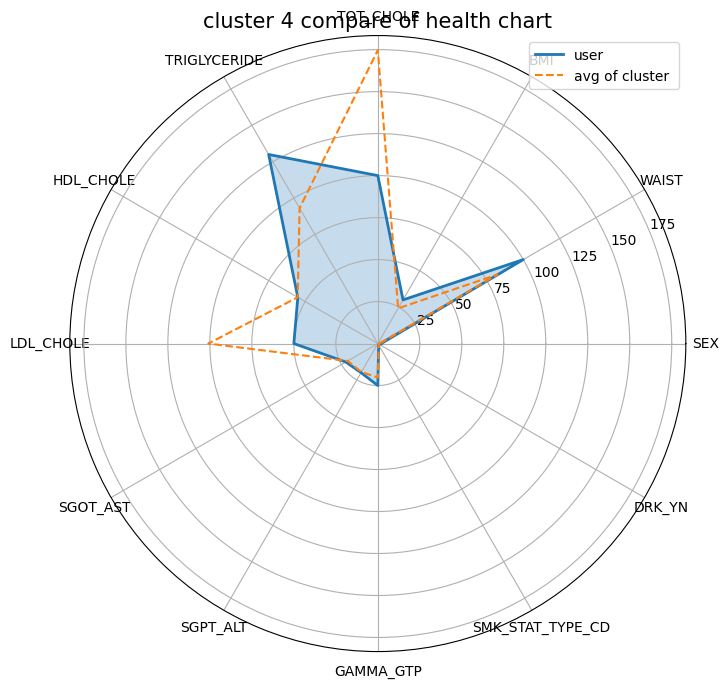

In [12]:
import joblib
import pandas as pd
import numpy as np

# 5. Î¶¨Ìè¨Ìä∏ ÏÉùÏÑ±
user_values = new_user.iloc[0][features]
cluster_avg_values = cluster_means.loc[cluster][features]

report = pd.DataFrame({
    "ÏÇ¨Ïö©Ïûê Í∞í": user_values,
    "ÏßëÎã® ÌèâÍ∑†": cluster_avg_values,
    "Ï∞®Ïù¥": user_values - cluster_avg_values
})

print("üìä ÏÇ¨Ïö©Ïûê vs ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌèâÍ∑† ÎπÑÍµê:\n")
print(report)

# 6. Radar Chart ÏãúÍ∞ÅÌôî
angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
angles += angles[:1]

user_plot_vals = user_values.tolist()
cluster_plot_vals = cluster_avg_values.tolist()
user_plot_vals += [user_plot_vals[0]]
cluster_plot_vals += [cluster_plot_vals[0]]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, user_plot_vals, label='user', linewidth=2)
ax.plot(angles, cluster_plot_vals, label='avg of cluster ', linestyle='--')
ax.fill(angles, user_plot_vals, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), features, fontsize=10)
plt.title(f'cluster {cluster} compare of health chart', size=15)
plt.legend(loc='upper right')
plt.show()


In [20]:
def calculate_bmi(height_cm, weight_kg):
    """ÌÇ§(cm)ÏôÄ Î™∏Î¨¥Í≤å(kg)Î•º Ïù¥Ïö©ÌïòÏó¨ BMIÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§."""
    if height_cm <= 0:
        return None
    height_m = height_cm / 100.0
    bmi = weight_kg / (height_m ** 2)
    return bmi

def get_obesity_level(bmi):
    """BMI Í∞íÏóê Îî∞Îùº ÎπÑÎßå Îã®Í≥ÑÎ•º Î∂ÑÎ•òÌï©ÎãàÎã§."""
    if bmi is None:
        return "ÌÇ§ Ï†ïÎ≥¥Í∞Ä ÏóÜÏñ¥ BMIÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§."
    elif bmi < 23.0:
        return "Ï†ïÏÉÅ"
    elif 23.0 <= bmi < 25.0:
        return "ÎπÑÎßåÏ†ÑÎã®Í≥Ñ"
    elif 25.0 <= bmi < 30.0:
        return "1Îã®Í≥Ñ ÎπÑÎßå"
    elif 30.0 <= bmi < 35.0:
        return "2Îã®Í≥Ñ ÎπÑÎßå"
    else:
        return "3Îã®Í≥Ñ ÎπÑÎßå(Í≥†ÎèÑ ÎπÑÎßå)"

# new_user Îç∞Ïù¥ÌÑ∞Í∞Ä Ïù¥ÎØ∏ Ï°¥Ïû¨ÌïòÎäî ÏÉÅÌÉúÏóêÏÑú BMIÏôÄ ÎπÑÎßåÎèÑ ÌôïÏù∏
user_bmi = new_user['BMI'].values[0]  # Ïù¥ÎØ∏ ÏûÖÎ†•Îêú BMI Í∞í ÌôúÏö©
obesity_level = get_obesity_level(user_bmi)

print("\nÏûÖÎ†•ÌïòÏã† Ï†ïÎ≥¥Î•º Î∞îÌÉïÏúºÎ°ú BMIÎ•º Í≥ÑÏÇ∞Ìïú Í≤∞Í≥º,")
print(f"ÎãπÏã†Ïùò BMIÎäî {user_bmi:.2f} kg/„é° Ïù¥Î©∞,")
print(f"ÎπÑÎßåÎèÑÎäî '{obesity_level}' Îã®Í≥ÑÏóê Ìï¥ÎãπÌï©ÎãàÎã§.")


ÏûÖÎ†•ÌïòÏã† Ï†ïÎ≥¥Î•º Î∞îÌÉïÏúºÎ°ú BMIÎ•º Í≥ÑÏÇ∞Ìïú Í≤∞Í≥º,
ÎãπÏã†Ïùò BMIÎäî 30.00 kg/„é° Ïù¥Î©∞,
ÎπÑÎßåÎèÑÎäî '2Îã®Í≥Ñ ÎπÑÎßå' Îã®Í≥ÑÏóê Ìï¥ÎãπÌï©ÎãàÎã§.


In [13]:
import joblib
import pandas as pd

# 1. ÏÇ¨Ïö©Ïûê ÏûÖÎ†• Î∞õÏùÄ ÌõÑ Ìï¥Îãπ Ïó∞Î†πÎåÄÏóê ÎßûÎäî Î™®Îç∏Í≥º Ïä§ÏºÄÏùºÎü¨ Î°úÎìú
age_group = new_user['AGE_GROUP'].values[0]

# Ìï¥Îãπ Ïó∞Î†πÎåÄÏùò Î™®Îç∏, Ïä§ÏºÄÏùºÎü¨, ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌèâÍ∑† Î∂àÎü¨Ïò§Í∏∞
model = joblib.load(f'kmeans_model_{age_group}.pkl')
scaler = joblib.load(f'scaler_{age_group}.pkl')
cluster_means = pd.read_csv(f'cluster_means_{age_group}.csv', index_col=0)


In [14]:
# 2. ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî
new_user_scaled = scaler.transform(new_user[features])

# 3. Íµ∞Ïßë ÏòàÏ∏°
current_cluster = model.predict(new_user_scaled)[0]
print(f"Ïù¥ ÏÇ¨Ïö©ÏûêÎäî {age_group} Í∑∏Î£πÏóêÏÑú {current_cluster}Î≤à ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌï©ÎãàÎã§.")


Ïù¥ ÏÇ¨Ïö©ÏûêÎäî 7 Í∑∏Î£πÏóêÏÑú 4Î≤à ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌï©ÎãàÎã§.


In [15]:
# ÌòÑÏû¨ Íµ∞ÏßëÏùò ÌèâÍ∑† Í∞í Í∞ÄÏ†∏Ïò§Í∏∞
current_cluster_values = cluster_means.loc[current_cluster, ['WAIST', 'TRIGLYCERIDE', 'TOT_CHOLE', 'HDL_CHOLE']]


In [16]:
# ÎØ∏Îûò Ïó∞Î†πÎåÄ ÏÑ§Ï†ï
future_age_group = age_group + 1

# ÎØ∏Îûò Ïó∞Î†πÎåÄ Íµ∞Ïßë ÌèâÍ∑† Î°úÎìú
future_cluster_means = pd.read_csv(f'cluster_means_{future_age_group}.csv', index_col=0)


In [17]:
from sklearn.metrics import pairwise_distances
import numpy as np

# ÌòÑÏû¨ Íµ∞ÏßëÏùò Í±¥Í∞ï ÏßÄÌëú (WAIST, TRIGLYCERIDE) Í∞í
current_values = current_cluster_values[['WAIST', 'TRIGLYCERIDE']].values.reshape(1, -1)

# ÎØ∏Îûò Ïó∞Î†πÎåÄ Íµ∞ÏßëÎì§Ïùò WAIST, TRIGLYCERIDE Í∞í
future_values = future_cluster_means[['WAIST', 'TRIGLYCERIDE']].values

# Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ Í≥ÑÏÇ∞
distances = pairwise_distances(current_values, future_values)

# Í∞ÄÏû• Í∞ÄÍπåÏö¥ Íµ∞Ïßë Ï∞æÍ∏∞ (Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ Í∏∞Ï§Ä)
closest_cluster_index = np.argmin(distances)


In [18]:
# ÎØ∏Îûò Íµ∞ÏßëÏùò ÌèâÍ∑† Í∞í
future_values = future_cluster_means.iloc[closest_cluster_index][['WAIST', 'TRIGLYCERIDE', 'TOT_CHOLE', 'HDL_CHOLE']]

# Î≥ÄÌôîÎüâ Í≥ÑÏÇ∞ (WAIST, TRIGLYCERIDE, TOT_CHOLE, HDL_CHOLE)
comparison_results = {
    'waist_change': future_values['WAIST'] - current_cluster_values['WAIST'],
    'triglyceride_change': future_values['TRIGLYCERIDE'] - current_cluster_values['TRIGLYCERIDE'],
    'tot_cho_change': future_values['TOT_CHOLE'] - current_cluster_values['TOT_CHOLE'],
    'hdl_change': future_values['HDL_CHOLE'] - current_cluster_values['HDL_CHOLE']
}


In [19]:
# Î¶¨Ìè¨Ìä∏ ÏÉùÏÑ±
report = f"## Íµ∞Ïßë ÎπÑÍµê Î¶¨Ìè¨Ìä∏\n\n"
report += f"**ÌòÑÏû¨ Ïó∞Î†πÎåÄ (AGE_GROUP {age_group})**\n"
report += f"**ÌòÑÏû¨ Íµ∞Ïßë {current_cluster}**ÏôÄ **ÎØ∏Îûò Ïó∞Î†πÎåÄ (AGE_GROUP {future_age_group}) Íµ∞Ïßë {closest_cluster_index}** ÎπÑÍµê\n\n"

report += f"**Î≥ÄÌôîÎüâ:**\n"
report += f"- WAIST Î≥ÄÌôîÎüâ: {comparison_results['waist_change']:.2f} cm\n"
report += f"- TRIGLYCERIDE Î≥ÄÌôîÎüâ: {comparison_results['triglyceride_change']:.2f} mg/dL\n"
report += f"- TOT_CHOLE Î≥ÄÌôîÎüâ: {comparison_results['tot_cho_change']:.2f} mg/dL\n"
report += f"- HDL_CHOLE Î≥ÄÌôîÎüâ: {comparison_results['hdl_change']:.2f} mg/dL\n\n"

report += "Ïù¥ Î∂ÑÏÑùÏùÄ ÌòÑÏû¨ÏôÄ ÎØ∏ÎûòÏùò Íµ∞Ïßë Í∞Ñ Î≥ÄÌôîÎüâÏùÑ Í∏∞Î∞òÏúºÎ°ú ÏßÑÌñâÎêòÏóàÏäµÎãàÎã§. Ï∂îÍ∞ÄÏ†ÅÏù∏ Í±¥Í∞ï Îç∞Ïù¥ÌÑ∞Î•º Î∞òÏòÅÌïòÎ©¥ Îçî Ï†ïÌôïÌïú Î∂ÑÏÑùÏù¥ Í∞ÄÎä•Ìï©ÎãàÎã§."

# Ï∂úÎ†•
print(report)


## Íµ∞Ïßë ÎπÑÍµê Î¶¨Ìè¨Ìä∏

**ÌòÑÏû¨ Ïó∞Î†πÎåÄ (AGE_GROUP 7)**
**ÌòÑÏû¨ Íµ∞Ïßë 4**ÏôÄ **ÎØ∏Îûò Ïó∞Î†πÎåÄ (AGE_GROUP 8) Íµ∞Ïßë 1** ÎπÑÍµê

**Î≥ÄÌôîÎüâ:**
- WAIST Î≥ÄÌôîÎüâ: -3.43 cm
- TRIGLYCERIDE Î≥ÄÌôîÎüâ: 4.67 mg/dL
- TOT_CHOLE Î≥ÄÌôîÎüâ: 2.53 mg/dL
- HDL_CHOLE Î≥ÄÌôîÎüâ: 2.63 mg/dL

Ïù¥ Î∂ÑÏÑùÏùÄ ÌòÑÏû¨ÏôÄ ÎØ∏ÎûòÏùò Íµ∞Ïßë Í∞Ñ Î≥ÄÌôîÎüâÏùÑ Í∏∞Î∞òÏúºÎ°ú ÏßÑÌñâÎêòÏóàÏäµÎãàÎã§. Ï∂îÍ∞ÄÏ†ÅÏù∏ Í±¥Í∞ï Îç∞Ïù¥ÌÑ∞Î•º Î∞òÏòÅÌïòÎ©¥ Îçî Ï†ïÌôïÌïú Î∂ÑÏÑùÏù¥ Í∞ÄÎä•Ìï©ÎãàÎã§.
